In [ ]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

time: 2.4 ms (started: 2021-03-18 07:46:04 +00:00)


In [ ]:
!pip install ipython-autotime

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.95 s (started: 2021-03-18 07:46:06 +00:00)


In [ ]:
# load dataset
df = pd.read_excel("Force Dataset.xlsx")
df.tail()

,Displacement,L,B,T,a,b,c,FORCE,time,z,v
8529,11110.0,112.192121,27.940567,5.115273,25494.245033,23120.240497,31641.777057,6063.078356,491,0.120338,0.148511
8530,11110.0,112.192121,27.940567,5.115273,25494.245033,23120.240497,31641.777057,6063.078356,493,0.120753,0.149022
8531,11110.0,112.192121,27.940567,5.115273,25494.245033,23120.240497,31641.777057,6063.078356,495,0.121092,0.149441
8532,11110.0,112.192121,27.940567,5.115273,25494.245033,23120.240497,31641.777057,6063.078356,497,0.121355,0.149766
8533,11110.0,112.192121,27.940567,5.115273,25494.245033,23120.240497,31641.777057,6063.078356,499,0.121543,0.149998


time: 953 ms (started: 2021-03-18 07:46:09 +00:00)


In [ ]:
df.isnull().sum() #no missing data

Displacement    0
L               0
B               0
T               0
a               0
b               0
c               0
FORCE           0
time            0
z               0
v               0
dtype: int64

time: 8.37 ms (started: 2021-03-18 07:46:10 +00:00)


In [ ]:
#training the model
X = df[['L','B','T','time']].values
y = df[['z']].values

time: 6.02 ms (started: 2021-03-18 07:46:10 +00:00)


In [ ]:
np.random.seed(42)

time: 3.6 ms (started: 2021-03-18 07:46:10 +00:00)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_Test = train_test_split(X,y,test_size=0.2,random_state=42)

time: 256 ms (started: 2021-03-18 07:46:10 +00:00)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

time: 2.53 ms (started: 2021-03-18 07:46:10 +00:00)


In [ ]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

time: 6.34 ms (started: 2021-03-18 07:46:10 +00:00)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

time: 1.79 s (started: 2021-03-18 07:46:10 +00:00)


In [ ]:
model = Sequential()
model.add(Dense(400,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse')
model.fit(X_train,y_train,batch_size=32,epochs=20)

Epoch 1/20
214/214 [==============================] - 2s 7ms/step - loss: 0.0123
Epoch 2/20
214/214 [==============================] - 2s 7ms/step - loss: 5.2164e-04
Epoch 3/20
214/214 [==============================] - 1s 7ms/step - loss: 3.5788e-04
Epoch 4/20
214/214 [==============================] - 1s 7ms/step - loss: 2.2617e-04
Epoch 5/20
214/214 [==============================] - 2s 7ms/step - loss: 1.8110e-04
Epoch 6/20
214/214 [==============================] - 1s 7ms/step - loss: 2.1389e-04
Epoch 7/20
214/214 [==============================] - 1s 7ms/step - loss: 1.5222e-04
Epoch 8/20
214/214 [==============================] - 1s 7ms/step - loss: 1.2972e-04
Epoch 9/20
214/214 [==============================] - 2s 7ms/step - loss: 1.2255e-04
Epoch 10/20
214/214 [==============================] - 2s 7ms/step - loss: 1.2555e-04
Epoch 11/20
214/214 [==============================] - 2s 7ms/step - loss: 1.2109e-04
Epoch 12/20
214/214 [==============================] - 2s 7ms/step 

time: 31.7 s (started: 2021-03-18 07:46:12 +00:00)


In [ ]:
#model.save('my_model.h5') 

time: 803 µs (started: 2021-03-18 07:46:43 +00:00)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               2000      
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 401       
Total params: 323,201
Trainable params: 323,201
Non-trainable params: 0
_________________________________________________________________
time: 8.5 ms (started: 2021-03-18 07:46:43 +00:00)


In [ ]:
loss_df = pd.DataFrame(model.history.history)

time: 4.75 ms (started: 2021-03-18 07:46:43 +00:00)


Text(0, 0.5, 'Mean squared error')

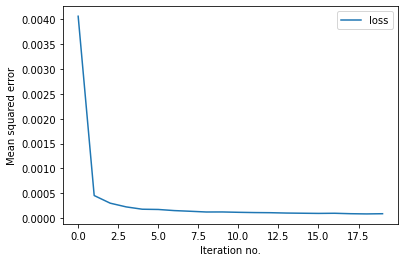

time: 279 ms (started: 2021-03-18 07:46:43 +00:00)


In [ ]:
loss_df.plot()
plt.xlabel("Iteration no.")
plt.ylabel("Mean squared error")
#loss_df.savefig('1 rmse.png')

In [ ]:
model.evaluate(X_test,y_Test)

54/54 [==============================] - 0s 2ms/step - loss: 1.0808e-04


0.00010807813669089228

time: 296 ms (started: 2021-03-18 07:46:44 +00:00)


In [ ]:
model.evaluate(X_train,y_train)

214/214 [==============================] - 0s 2ms/step - loss: 9.9604e-05


9.960371244233102e-05

time: 526 ms (started: 2021-03-18 07:46:44 +00:00)


In [ ]:
train_predictions= model.predict(X_train)

time: 502 ms (started: 2021-03-18 07:46:45 +00:00)


In [ ]:
test_predictions = model.predict(X_test)

time: 138 ms (started: 2021-03-18 07:46:45 +00:00)


In [ ]:
test_predictions.shape

(1707, 1)

time: 3.51 ms (started: 2021-03-18 07:46:45 +00:00)


In [ ]:
print(test_predictions)

[[-0.03290673]
 [ 0.11053412]
 [ 0.11717144]
 ...
 [ 0.00898585]
 [ 0.01352906]
 [-0.04506253]]
time: 2.29 ms (started: 2021-03-18 07:46:45 +00:00)


In [ ]:
pred_df = pd.DataFrame(y_Test,columns=['Test True z'])

time: 2.47 ms (started: 2021-03-18 07:46:45 +00:00)


In [ ]:
pred_df2 = pd.DataFrame(test_predictions,columns=['Test predicted z'])

time: 2.98 ms (started: 2021-03-18 07:46:45 +00:00)


In [ ]:
pred_df = pd.concat([pred_df,pred_df2],axis=1)
pred_df

,Test True z,Test predicted z
0,-0.026371,-0.032907
1,0.102234,0.110534
2,0.121689,0.117171
3,-0.007470,-0.003432
4,-0.102224,-0.089041
...,...,...
1702,0.118405,0.115600
1703,0.049309,0.057413
1704,0.010873,0.008986
1705,0.006112,0.013529


time: 43.6 ms (started: 2021-03-18 07:46:45 +00:00)


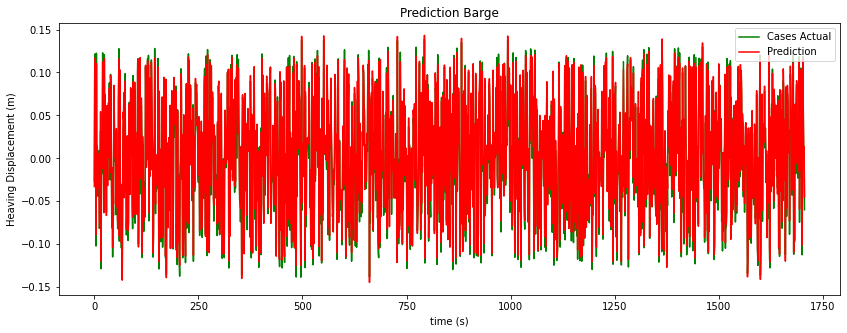

time: 515 ms (started: 2021-03-18 07:46:45 +00:00)


In [ ]:
fig=plt.figure (figsize = (14,5))
plt.plot(y_Test, color = 'green', label = 'Cases Actual')
plt.plot(test_predictions,color = 'red', label = 'Prediction')
plt.title('Prediction Barge')
plt.xlabel('time (s)')
plt.ylabel('Heaving Displacement (m)')
plt.legend()
plt.show()
fig.savefig('1.png')

In [ ]:
new_gem = [[154,40,8,9]]
new_gem = scaler.transform(new_gem)
new_gem

array([[1.37587605, 1.46813501, 1.67519028, 0.01803607]])

time: 4.81 ms (started: 2021-03-18 07:46:46 +00:00)


In [ ]:
model.predict(new_gem)

array([[0.13130756]], dtype=float32)

time: 60.7 ms (started: 2021-03-18 07:46:46 +00:00)


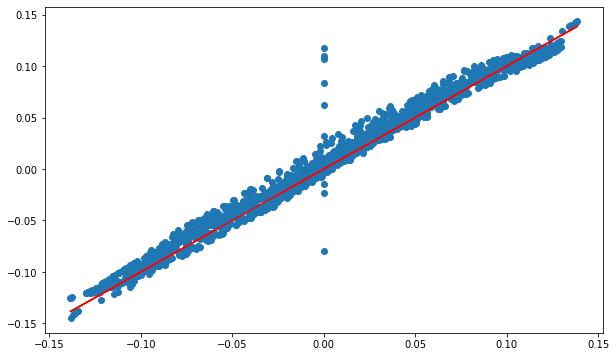

time: 217 ms (started: 2021-03-18 07:46:46 +00:00)


In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_Test,test_predictions)
plt.plot(y_Test,y_Test,'r')

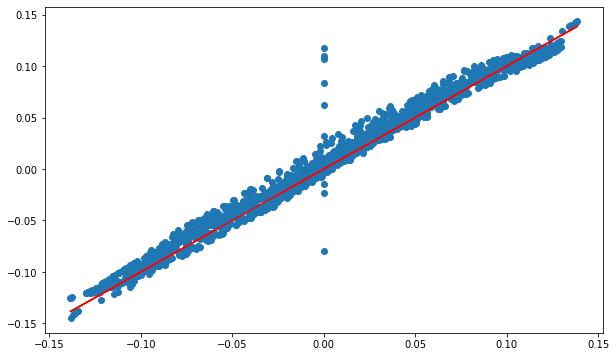

time: 229 ms (started: 2021-03-18 07:46:46 +00:00)


In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_Test,test_predictions)
plt.plot(y_Test,y_Test,'r')

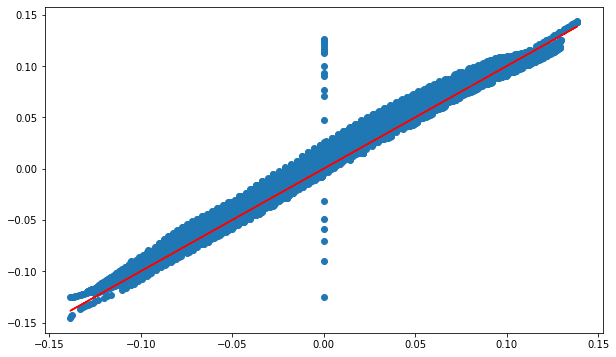

time: 239 ms (started: 2021-03-18 07:46:46 +00:00)


In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_train,train_predictions)
plt.plot(y_train,y_train,'r')

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_Test,test_predictions)

0.007137422138593711

time: 10.1 ms (started: 2021-03-18 07:46:47 +00:00)


In [ ]:
np.sqrt(mean_squared_error(y_Test,test_predictions))*100

1.0396063282024515

time: 4.43 ms (started: 2021-03-18 07:46:47 +00:00)


In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_Test,test_predictions)

0.9803028149385898

time: 8.51 ms (started: 2021-03-18 07:46:47 +00:00)


In [ ]:
testdf=pd.read_excel('Forced_testdata_lbt_86.03.xlsx')
testdf

,L,B,T,t
0,86.03,20,3.98,0
1,86.03,20,3.98,1
2,86.03,20,3.98,3
3,86.03,20,3.98,5
4,86.03,20,3.98,7
...,...,...,...,...
246,86.03,20,3.98,491
247,86.03,20,3.98,493
248,86.03,20,3.98,495
249,86.03,20,3.98,497


time: 71.3 ms (started: 2021-03-18 07:46:47 +00:00)


In [ ]:
testdfsca = scaler.transform(testdf)
testdfsca

array([[0.42795819, 0.34815419, 0.44556429, 0.        ],
       [0.42795819, 0.34815419, 0.44556429, 0.00200401],
       [0.42795819, 0.34815419, 0.44556429, 0.00601202],
       ...,
       [0.42795819, 0.34815419, 0.44556429, 0.99198397],
       [0.42795819, 0.34815419, 0.44556429, 0.99599198],
       [0.42795819, 0.34815419, 0.44556429, 1.        ]])

time: 12.8 ms (started: 2021-03-18 07:46:47 +00:00)


In [ ]:
predicttestdf=model.predict(testdfsca)

time: 75.5 ms (started: 2021-03-18 07:46:47 +00:00)


In [ ]:
predicttestdf


array([[ 0.0856014 ],
       [ 0.08535308],
       [ 0.08485643],
       [ 0.08435903],
       [ 0.08385563],
       [ 0.08329279],
       [ 0.08269207],
       [ 0.08209135],
       [ 0.08149064],
       [ 0.08088993],
       [ 0.08030452],
       [ 0.07967949],
       [ 0.07897045],
       [ 0.07826088],
       [ 0.07751159],
       [ 0.07675692],
       [ 0.07599964],
       [ 0.07522188],
       [ 0.07434991],
       [ 0.07335214],
       [ 0.072355  ],
       [ 0.07135831],
       [ 0.07036465],
       [ 0.06937867],
       [ 0.06839267],
       [ 0.06740668],
       [ 0.06642074],
       [ 0.06533881],
       [ 0.06422729],
       [ 0.06312056],
       [ 0.06202876],
       [ 0.06084193],
       [ 0.05962653],
       [ 0.05842175],
       [ 0.05722583],
       [ 0.05601149],
       [ 0.05469518],
       [ 0.05337137],
       [ 0.05196866],
       [ 0.05046621],
       [ 0.04896071],
       [ 0.04746815],
       [ 0.04601013],
       [ 0.04455594],
       [ 0.04305739],
       [ 0

time: 10.1 ms (started: 2021-03-18 07:46:47 +00:00)


In [ ]:
zreal=pd.read_excel('forced_z83.xlsx')
zreal

,z
0,0.000000
1,0.094556
2,0.094497
3,0.094379
4,0.094202
...,...
246,0.093512
247,0.093834
248,0.094097
249,0.094302


time: 28.4 ms (started: 2021-03-18 07:46:47 +00:00)


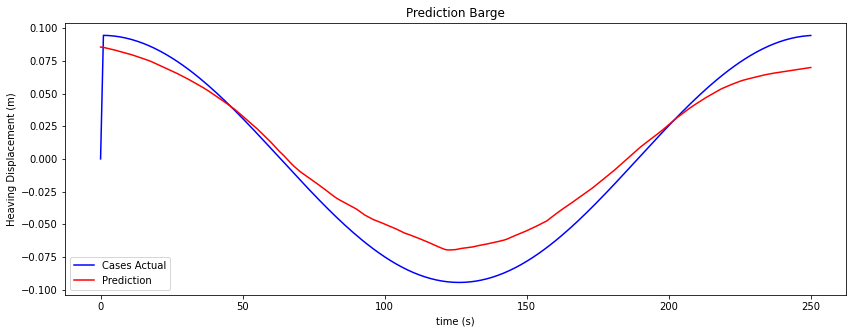

time: 338 ms (started: 2021-03-18 07:46:47 +00:00)


In [ ]:
fig=plt.figure (figsize = (14,5))
plt.plot(zreal, color = 'blue', label = 'Cases Actual')
plt.plot(predicttestdf,color = 'red', label = 'Prediction')
plt.title('Prediction Barge')
plt.xlabel('time (s)')
plt.ylabel('Heaving Displacement (m)')
plt.legend()
plt.show()
fig.savefig('1.png')